In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from sklearn.preprocessing import LabelEncoder
from PIL import Image

In [3]:
class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        
        if(logs.get('accuracy')>=0.99):
            print('\n Reached 99% accuracy so canceling training')
            self.model.stop_training = True

In [4]:
def get_labels(name):
    terms = name.split('_')  # Split using underscores
    class_name = terms[-1].replace('.npy', '')
    
    return class_name

In [5]:
file_names = ['full_numpy_bitmap_butterfly.npy',
              'full_numpy_bitmap_cake.npy',
              'full_numpy_bitmap_fish.npy',
              'full_numpy_bitmap_frog.npy',
              'full_numpy_bitmap_mushroom.npy',
              'full_numpy_bitmap_pants.npy',
              'full_numpy_bitmap_shoe.npy',
              'full_numpy_bitmap_star.npy',
              'full_numpy_bitmap_t-shirt.npy',
              'full_numpy_bitmap_television.npy',
              'full_numpy_bitmap_The Eiffel Tower.npy',
              'full_numpy_bitmap_umbrella.npy',
              'full_numpy_bitmap_bed.npy',
              'full_numpy_bitmap_basketball.npy',
              'full_numpy_bitmap_banana.npy',
              'full_numpy_bitmap_axe.npy', 
              'full_numpy_bitmap_apple.npy',
              'full_numpy_bitmap_ambulance.npy', 
              'full_numpy_bitmap_aircraft carrier.npy', 
              'full_numpy_bitmap_The Great Wall of China.npy', 
              'full_numpy_bitmap_The Mona Lisa.npy']

concatenated_array = np.array([])
concatenated_labels = np.array([])

arrays = [np.load(file_name) for file_name in file_names]
concatenated_array = np.concatenate(arrays, axis=0)


arrays_1 = [np.array([get_labels(file_name)] * len(np.load(file_name))) for file_name in file_names]
concatenated_labels = np.concatenate(arrays_1, axis=0)


In [6]:
print(concatenated_labels.shape)
print(concatenated_array[0].shape)

(2990978,)
(784,)


In [7]:
np.unique(concatenated_labels, return_counts=True)

(array(['The Eiffel Tower', 'The Great Wall of China', 'The Mona Lisa',
        'aircraft carrier', 'ambulance', 'apple', 'axe', 'banana',
        'basketball', 'bed', 'butterfly', 'cake', 'fish', 'frog',
        'mushroom', 'pants', 'shoe', 'star', 't-shirt', 'television',
        'umbrella'], dtype='<U23'),
 array([134801, 193015, 121383, 116504, 148004, 144722, 124122, 307936,
        133793, 113862, 117999, 124905, 134150, 159047, 142167, 144264,
        120231, 137619, 125233, 123137, 124084], dtype=int64))

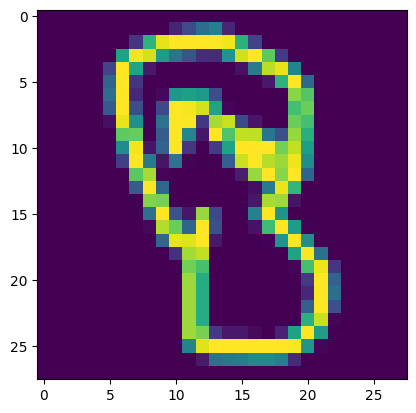

In [8]:
plt.imshow(concatenated_array[500000].reshape((28,28)))

In [ ]:
encoder = LabelEncoder()
concatenated_labels_int = encoder.fit_transform(concatenated_labels)

In [ ]:
np.unique(concatenated_labels_int, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20], dtype=int64),
 array([134801, 193015, 121383, 116504, 148004, 144722, 124122, 307936,
        133793, 113862, 117999, 124905, 134150, 159047, 142167, 144264,
        120231, 137619, 125233, 123137, 124084], dtype=int64))

In [ ]:
indices = np.arange(len(concatenated_array))

np.random.shuffle(indices)

X_train = concatenated_array[indices]
Y_train_int = concatenated_labels_int[indices]
Y_train = concatenated_labels[indices]


In [ ]:
callbacks = myCallback()

model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(100 , activation ='selu'),
    keras.layers.Dense(21 ,  activation ='softmax' )
    ])

# model = Sequential()
#     model.add(Conv2D(32, (5, 5), input_shape=(image_x,image_y,1), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
#     model.add(Conv2D(64, (5, 5), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.6))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.6))
#     model.add(Dense(num_of_classes, activation='softmax'))

model.summary()


model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics ='accuracy'
)

In [ ]:
X_train[0].shape

In [ ]:
model_history = model.fit(X_train , Y_train_int , epochs= 3, batch_size=256, callbacks = [callbacks])

In [ ]:
image_path = 'hello (48)-modified.png'
image = Image.open(image_path)
image = image.convert("L")

# # Display some basic information about the image
# print("Image format:", image.format)
# print("Image size:", image.size)
# print("Image mode:", image.mode)

desired_size = (28, 28)
resized_image = image.resize(desired_size)

image_array = np.array(resized_image)

# Now you can work with the image_array as needed
# For example, you can use it as input for your model


In [ ]:
plt.imshow(resized_image)

In [ ]:
image_array = image_array.reshape((1,784,))

In [ ]:
image_array.shape

In [ ]:
model.predict(image_array)

In [ ]:
# predictions = np.argmax(model.predict(concatenated_array[500000].reshape((1,784))), axis=1)
predictions = np.argmax(model.predict(image_array), axis=1)

In [ ]:
type(predictions) 

In [ ]:
encoder.inverse_transform(predictions)